In [1]:
import torch

In [2]:
BATCH_SIZE = 64
INPUT_SIZE = 784
HIDDEN_SIZES = [128, 64]
OUTPUT_SIZE = 10

In [3]:
from torchvision import datasets, transforms

In [4]:
# define a transform to normalize the datae
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [5]:
train_set = datasets.MNIST('~/courses/ai/data/', download=True, train=True, transform=transform)
test_set = datasets.MNIST('~/courses/ai/data/', download=True, train=False, transform=transform)

In [6]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=True)

In [7]:
from torch import nn

# Build a feed-forward network
model = nn.Sequential(nn.Linear(INPUT_SIZE, HIDDEN_SIZES[0]),
                      nn.ReLU(),
                      nn.Linear(HIDDEN_SIZES[0], HIDDEN_SIZES[1]),
                      nn.ReLU(),
                      nn.Linear(HIDDEN_SIZES[1], OUTPUT_SIZE),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [10]:
from time import time
import torch.optim as optim

In [13]:
loss_fn = nn.NLLLoss()

optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

time0 = time()

epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = loss_fn(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.2813636338564633
Epoch 1 - Training loss: 0.21855116665347427
Epoch 2 - Training loss: 0.17429991214593718
Epoch 3 - Training loss: 0.1469225993107901
Epoch 4 - Training loss: 0.12617732961374178
Epoch 5 - Training loss: 0.10927262756504866
Epoch 6 - Training loss: 0.09741081708847586
Epoch 7 - Training loss: 0.08741721063693449
Epoch 8 - Training loss: 0.07847594560336457
Epoch 9 - Training loss: 0.07245490845761446
Epoch 10 - Training loss: 0.0654498518867565
Epoch 11 - Training loss: 0.06061202599761337
Epoch 12 - Training loss: 0.05532093981811122
Epoch 13 - Training loss: 0.05046404516403832
Epoch 14 - Training loss: 0.047608563749949685

Training Time (in minutes) = 3.0677786469459534


In [17]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [21]:
import numpy as np
import matplotlib.pyplot as plt

Predicted Digit = 5


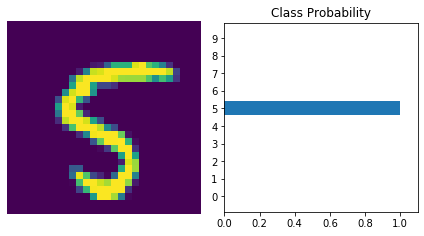

In [25]:
images, labels = next(iter(test_loader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)